In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!nvidia-smi

Sat Feb 25 08:08:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive (6).zip', 'r') 
zip_ref.extractall('/tmp') 
zip_ref.close()

In [ ]:
len(os.listdir('/tmp/pizza_not_pizza/'))

3

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("/tmp/pizza_not_pizza/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in '/tmp/pizza_not_pizza/'.
There are 0 directories and 983 images in '/tmp/pizza_not_pizza/not_pizza'.
There are 0 directories and 983 images in '/tmp/pizza_not_pizza/pizza'.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/tmp/pizza_not_pizza/"

data_gen = ImageDataGenerator(rescale=1/255., validation_split = 0.2)

print('Training images:')
train_data = data_gen.flow_from_directory(data_dir,
                                          target_size = (224,224),
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary',
                                          seed = 42)
print("Testing images")
test_data = data_gen.flow_from_directory(data_dir, 
                                         target_size = (224,224),
                                         batch_size = 32,
                                         subset = 'validation',
                                         class_mode = 'binary',
                                         seed = 42)

Training images:
Found 1574 images belonging to 2 classes.
Testing images
Found 392 images belonging to 2 classes.


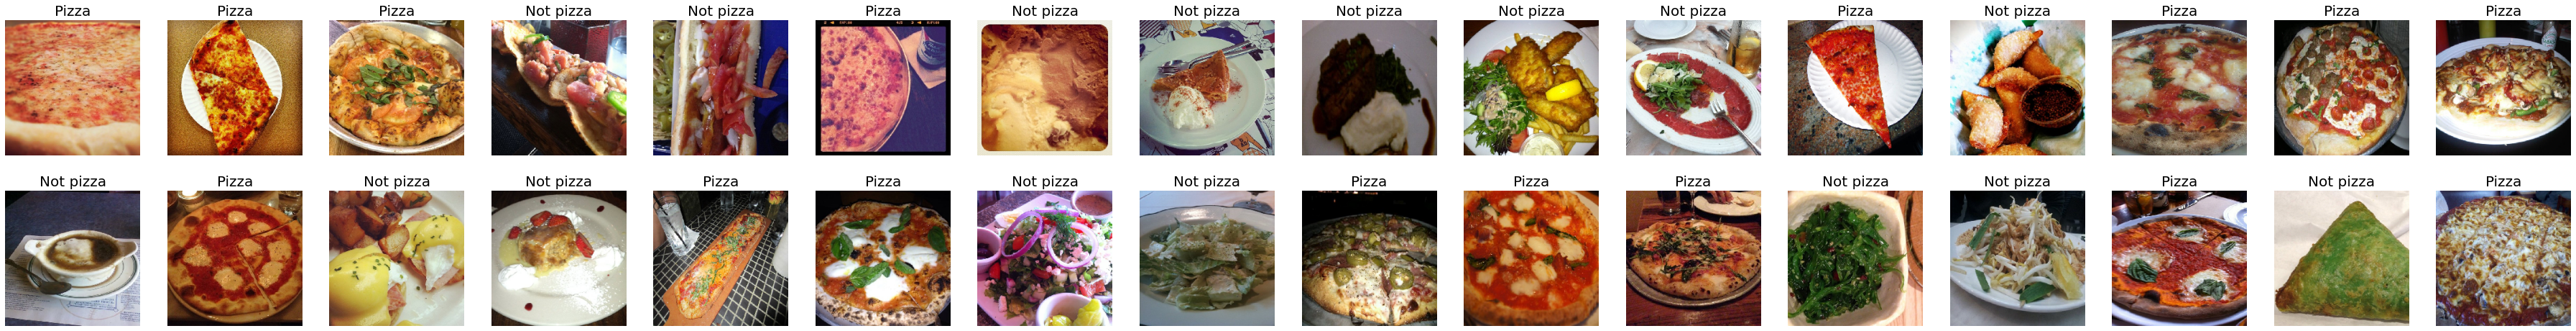

In [ ]:
def plot_multiple_images(images_batch, n = 32):
    n_cols = n//2
    n_rows = 2
    plt.figure(figsize=(4*n_cols, 4*n_rows))
    images, labels = images_batch
    
    for i in range(n):
        index = i 
        image = tf.expand_dims(images[index], 0).numpy()
        image = np.squeeze(image, axis=0)
        label = labels[index]
        if label == 0:
            title = 'Not pizza'
        else:
            title = 'Pizza'
        plt.subplot(n_rows, n_cols, i + 1)
        plt.title(title, fontsize=int(20), color='black')
        plt.imshow(image)
        plt.axis("off")
        
plot_multiple_images(next(train_data))

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
50/50 [==============================] - 21s 211ms/step - loss: 1.4917 - accuracy: 0.5368 - val_loss: 0.6493 - val_accuracy: 0.6173
Epoch 2/5
50/50 [==============================] - 8s 169ms/step - loss: 0.5944 - accuracy: 0.6868 - val_loss: 0.6148 - val_accuracy: 0.6735
Epoch 3/5
50/50 [==============================] - 10s 200ms/step - loss: 0.4891 - accuracy: 0.7783 - val_loss: 0.5521 - val_accuracy: 0.7245
Epoch 4/5
50/50 [==============================] - 10s 207ms/step - loss: 0.3431 - accuracy: 0.8723 - val_loss: 0.5720 - val_accuracy: 0.7143
Epoch 5/5
50/50 [==============================] - 10s 191ms/step - loss: 0.2451 - accuracy: 0.9238 - val_loss: 0.7589 - val_accuracy: 0.6480


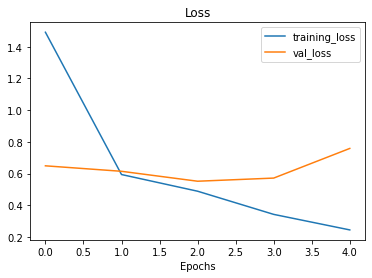

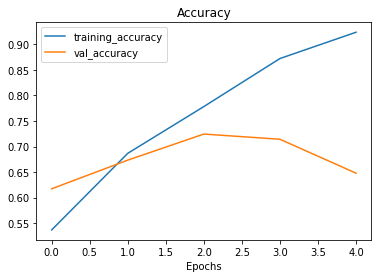

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])



model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



history_2 = model_2.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
50/50 [==============================] - 12s 208ms/step - loss: 0.7887 - accuracy: 0.5756 - val_loss: 0.6073 - val_accuracy: 0.6709
Epoch 2/20
50/50 [==============================] - 11s 225ms/step - loss: 0.5989 - accuracy: 0.6957 - val_loss: 0.5675 - val_accuracy: 0.7551
Epoch 3/20
50/50 [==============================] - 10s 194ms/step - loss: 0.5421 - accuracy: 0.7338 - val_loss: 0.5593 - val_accuracy: 0.7194
Epoch 4/20
50/50 [==============================] - 9s 171ms/step - loss: 0.4944 - accuracy: 0.7694 - val_loss: 0.5717 - val_accuracy: 0.7219
Epoch 5/20
50/50 [==============================] - 11s 212ms/step - loss: 0.4221 - accuracy: 0.8234 - val_loss: 0.5512 - val_accuracy: 0.7321
Epoch 6/20
50/50 [==============================] - 11s 217ms/step - loss: 0.3735 - accuracy: 0.8526 - val_loss: 0.5685 - val_accuracy: 0.7219
Epoch 7/20
50/50 [==============================] - 9s 185ms/step - loss: 0.2956 - accuracy: 0.8920 - val_loss: 0.5845 - val_accuracy: 0.7015
E

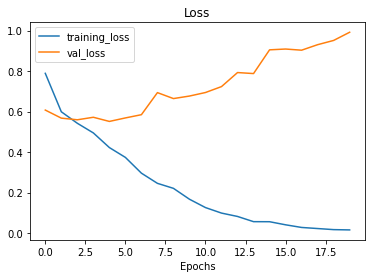

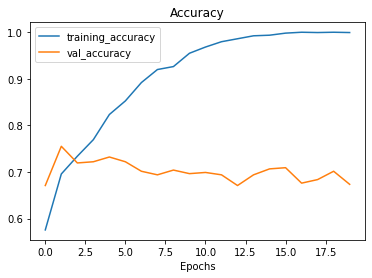

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_3 = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
    tf.keras.layers.Conv2D(16, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    
    tf.keras.layers.Dense(1, activation="sigmoid") 
])


model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_3 = model_3.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
50/50 [==============================] - 12s 204ms/step - loss: 0.7012 - accuracy: 0.5108 - val_loss: 0.6857 - val_accuracy: 0.6429
Epoch 2/10
50/50 [==============================] - 11s 215ms/step - loss: 0.6744 - accuracy: 0.5762 - val_loss: 0.6165 - val_accuracy: 0.6811
Epoch 3/10
50/50 [==============================] - 11s 212ms/step - loss: 0.6187 - accuracy: 0.6658 - val_loss: 0.5677 - val_accuracy: 0.7347
Epoch 4/10
50/50 [==============================] - 9s 180ms/step - loss: 0.5796 - accuracy: 0.7071 - val_loss: 0.5504 - val_accuracy: 0.7219
Epoch 5/10
50/50 [==============================] - 10s 201ms/step - loss: 0.5751 - accuracy: 0.7179 - val_loss: 0.4978 - val_accuracy: 0.7806
Epoch 6/10
50/50 [==============================] - 10s 197ms/step - loss: 0.5224 - accuracy: 0.7490 - val_loss: 0.4937 - val_accuracy: 0.7602
Epoch 7/10
50/50 [==============================] - 9s 173ms/step - loss: 0.4892 - accuracy: 0.7719 - val_loss: 0.4593 - val_accuracy: 0.7832
E

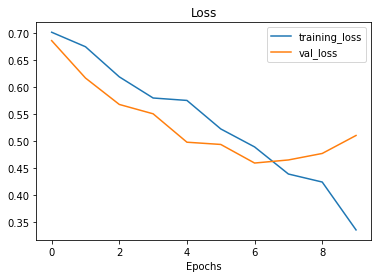

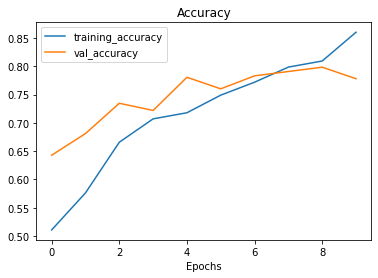

In [ ]:
plot_loss_curves(history_3)

###Data Augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             shear_range=0.2, 
                                             zoom_range=0.2, 
                                             width_shift_range=0.2,
                                             height_shift_range=0.2, 
                                             horizontal_flip=True,
                                             validation_split = 0.2)

train_data_augmented = train_datagen_augmented.flow_from_directory(data_dir,
                                                                  target_size = (224, 224),
                                                                  batch_size = 32,
                                                                  class_mode = 'binary',
                                                                  subset = 'training')


Found 1574 images belonging to 2 classes.


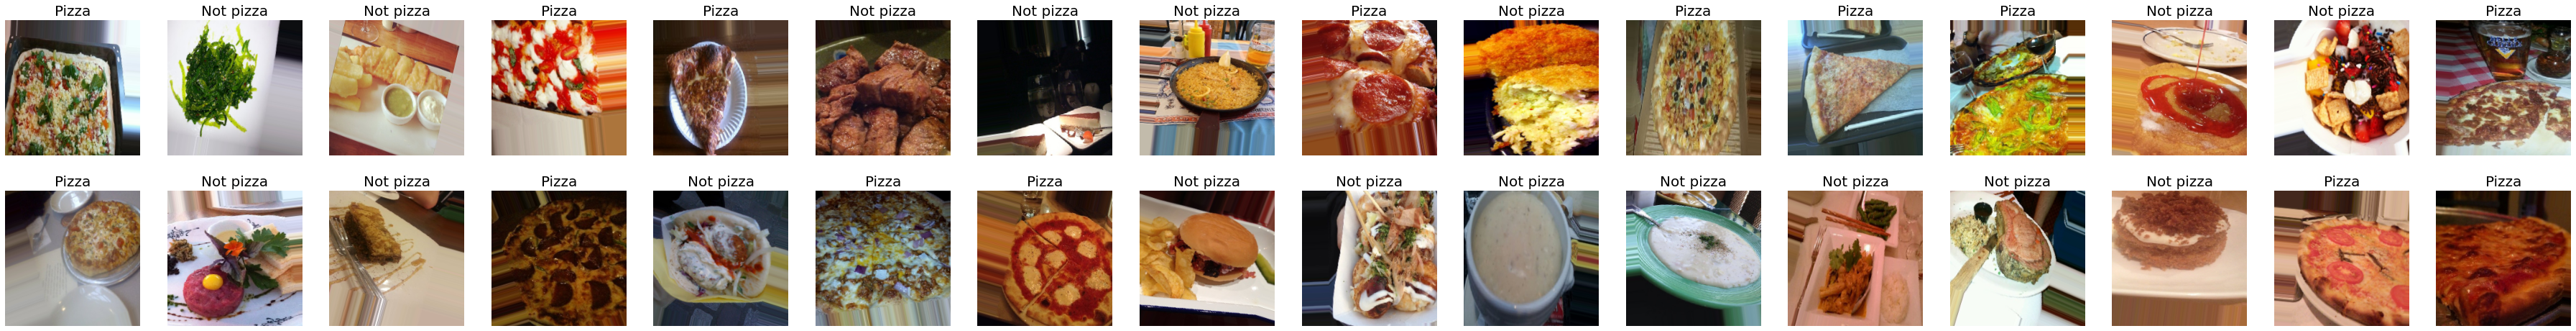

In [ ]:
plot_multiple_images(next(train_data_augmented))

In [ ]:
len(train_data_augmented)

50

In [ ]:
model_4 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_4 = model_4.fit(train_data_augmented,
                        epochs = 10,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/10
50/50 [==============================] - 26s 464ms/step - loss: 0.7057 - accuracy: 0.5610 - val_loss: 0.6633 - val_accuracy: 0.6020
Epoch 2/10
50/50 [==============================] - 27s 536ms/step - loss: 0.6450 - accuracy: 0.6125 - val_loss: 0.5616 - val_accuracy: 0.7168
Epoch 3/10
50/50 [==============================] - 24s 487ms/step - loss: 0.6085 - accuracy: 0.6715 - val_loss: 0.5607 - val_accuracy: 0.7194
Epoch 4/10
50/50 [==============================] - 24s 484ms/step - loss: 0.5976 - accuracy: 0.6715 - val_loss: 0.5813 - val_accuracy: 0.7041
Epoch 5/10
50/50 [==============================] - 24s 478ms/step - loss: 0.5770 - accuracy: 0.7147 - val_loss: 0.6360 - val_accuracy: 0.6862
Epoch 6/10
50/50 [==============================] - 27s 520ms/step - loss: 0.5567 - accuracy: 0.7224 - val_loss: 0.6669 - val_accuracy: 0.6658
Epoch 7/10
50/50 [==============================] - 24s 478ms/step - loss: 0.5287 - accuracy: 0.7490 - val_loss: 0.7743 - val_accuracy: 0.6403

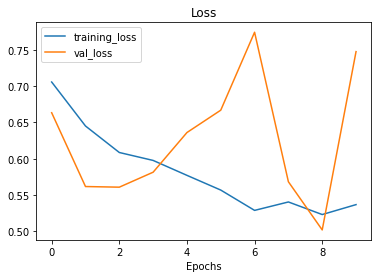

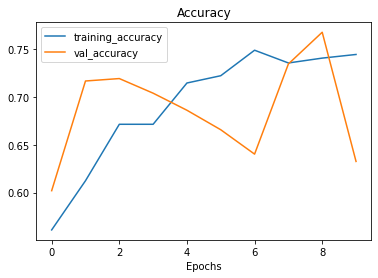

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_5 = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
    tf.keras.layers.Conv2D(16, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    
    tf.keras.layers.Dense(1, activation="sigmoid") 
])

model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data_augmented,
                        epochs = 10,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/10
50/50 [==============================] - 27s 478ms/step - loss: 0.6657 - accuracy: 0.5851 - val_loss: 0.7201 - val_accuracy: 0.5740
Epoch 2/10
50/50 [==============================] - 25s 495ms/step - loss: 0.6296 - accuracy: 0.6582 - val_loss: 0.5749 - val_accuracy: 0.6811
Epoch 3/10
50/50 [==============================] - 24s 473ms/step - loss: 0.6200 - accuracy: 0.6595 - val_loss: 0.5396 - val_accuracy: 0.7449
Epoch 4/10
50/50 [==============================] - 26s 513ms/step - loss: 0.5701 - accuracy: 0.7128 - val_loss: 0.5066 - val_accuracy: 0.7602
Epoch 5/10
50/50 [==============================] - 25s 495ms/step - loss: 0.5901 - accuracy: 0.7078 - val_loss: 0.5657 - val_accuracy: 0.7423
Epoch 6/10
50/50 [==============================] - 23s 465ms/step - loss: 0.5582 - accuracy: 0.7224 - val_loss: 0.5343 - val_accuracy: 0.7449
Epoch 7/10
50/50 [==============================] - 25s 491ms/step - loss: 0.5368 - accuracy: 0.7363 - val_loss: 0.5015 - val_accuracy: 0.7679

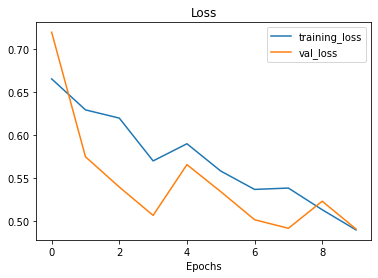

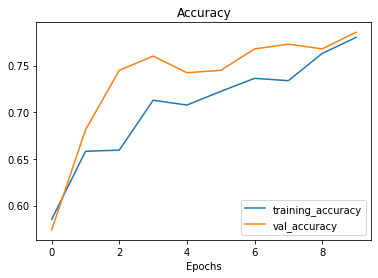

In [ ]:
plot_loss_curves(history_5)

### Transfer Learning

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1"

In [ ]:
def create_model(model_url, num_classes=1):
  
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, 
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224,3)) 
 
  model = tf.keras.Sequential([
    feature_extractor_layer, 
    layers.Dense(num_classes, activation='sigmoid', name='output_layer')      
  ])

  return model

In [ ]:
resnet_model = create_model(resnet_url, num_classes=1)

resnet_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
resnet_history = resnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                         experiment_name="resnet50V2")]) 

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20230217-194932
Epoch 1/5
50/50 [==============================] - 347s 7s/step - loss: 0.3907 - accuracy: 0.8202 - val_loss: 0.2072 - val_accuracy: 0.9362
Epoch 2/5
50/50 [==============================] - 303s 6s/step - loss: 0.1736 - accuracy: 0.9447 - val_loss: 0.1604 - val_accuracy: 0.9439
Epoch 3/5
50/50 [==============================] - 289s 6s/step - loss: 0.1419 - accuracy: 0.9562 - val_loss: 0.1525 - val_accuracy: 0.9439
Epoch 4/5
50/50 [==============================] - 378s 8s/step - loss: 0.1245 - accuracy: 0.9581 - val_loss: 0.1388 - val_accuracy: 0.9541
Epoch 5/5
50/50 [==============================] - 314s 6s/step - loss: 0.1117 - accuracy: 0.9600 - val_loss: 0.1358 - val_accuracy: 0.9464


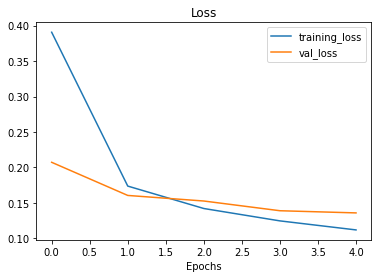

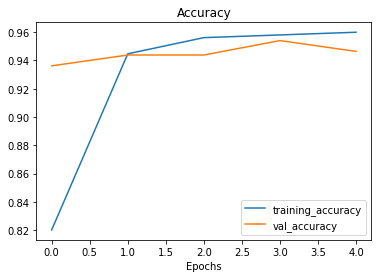

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
efficientnet_model = create_model(model_url = efficientnet_url,
                                  num_classes = 1)
efficientnet_model.compile(loss = 'binary_crossentropy',
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ['accuracy'])

efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=5,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                                                     experiment_name='efficientnetB6')])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB6/20230217-202516
Epoch 1/5
50/50 [==============================] - 158s 3s/step - loss: 0.3344 - accuracy: 0.8971 - val_loss: 0.2049 - val_accuracy: 0.9388
Epoch 2/5
50/50 [==============================] - 140s 3s/step - loss: 0.1696 - accuracy: 0.9466 - val_loss: 0.1532 - val_accuracy: 0.9643
Epoch 3/5
50/50 [==============================] - 140s 3s/step - loss: 0.1362 - accuracy: 0.9504 - val_loss: 0.1299 - val_accuracy: 0.9643
Epoch 4/5
50/50 [==============================] - 141s 3s/step - loss: 0.1184 - accuracy: 0.9581 - val_loss: 0.1176 - val_accuracy: 0.9668
Epoch 5/5
50/50 [==============================] - 128s 3s/step - loss: 0.1069 - accuracy: 0.9612 - val_loss: 0.1097 - val_accuracy: 0.9643


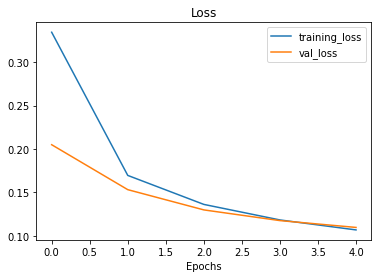

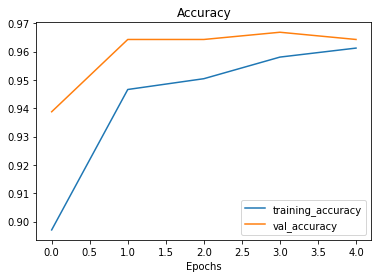

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
base_model_1 = tf.keras.applications.Xception(weights='imagenet', include_top=False ,input_shape=(224,224,3))
base_model_1.trainable = False 

xception_model = tf.keras.Sequential([base_model_1, 
                               tf.keras.layers.GlobalAveragePooling2D(),
                               tf.keras.layers.Dense(1, activation='sigmoid')])

xception_model.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss = 'binary_crossentropy', 
                metrics=['accuracy'])

    
earlystoping_callback = tf.keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True, 
                                                         monitor = 'val_accuracy', mode = 'auto')

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
xception_history = xception_model.fit(train_data, 
                        shuffle=True, 
                        steps_per_epoch=len(train_data), 
                        epochs= 5,
                        validation_data= test_data, 
                        validation_steps = len(test_data),
                        callbacks= [earlystoping_callback])

Epoch 1/5
50/50 [==============================] - 413s 8s/step - loss: 0.2747 - accuracy: 0.9111 - val_loss: 0.1575 - val_accuracy: 0.9388
Epoch 2/5
50/50 [==============================] - 406s 8s/step - loss: 0.1340 - accuracy: 0.9492 - val_loss: 0.1434 - val_accuracy: 0.9388
Epoch 3/5
50/50 [==============================] - 402s 8s/step - loss: 0.1175 - accuracy: 0.9530 - val_loss: 0.1378 - val_accuracy: 0.9388
Epoch 4/5
50/50 [==============================] - 401s 8s/step - loss: 0.1078 - accuracy: 0.9549 - val_loss: 0.1378 - val_accuracy: 0.9439
Epoch 5/5
50/50 [==============================] - 413s 8s/step - loss: 0.0994 - accuracy: 0.9600 - val_loss: 0.1314 - val_accuracy: 0.9490


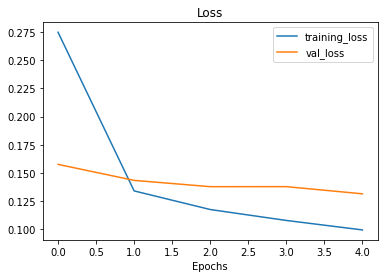

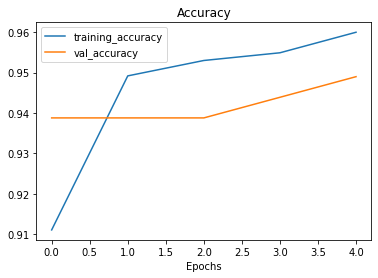

In [ ]:
plot_loss_curves(xception_history)

In [ ]:
base_model_2 = tf.keras.applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(224, 224,3))
base_model_2.trainable = False

inception_model = tf.keras.Sequential([base_model_2,
                      tf.keras.layers.GlobalAveragePooling2D(),
                      tf.keras.layers.Dropout(0.2),
                      tf.keras.layers.Dense(1,'sigmoid')
                      ]
)



inception_model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
inception_model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
file_path="weights.best.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(file_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

early = tf.keras.callbacks.EarlyStopping(monitor="accuracy", mode="max", patience=3)

callbacks_list = [checkpoint, early] 

inception_history = inception_model.fit(train_data, 
                        epochs=5, 
                        shuffle=True,
                        steps_per_epoch=len(train_data), 
                        validation_data= test_data,
                        validation_steps=len(test_data),
                        callbacks=callbacks_list)

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 0.2960 - accuracy: 0.8717
Epoch 1: accuracy improved from -inf to 0.87166, saving model to weights.best.hdf5
50/50 [==============================] - 227s 4s/step - loss: 0.2960 - accuracy: 0.8717 - val_loss: 0.1587 - val_accuracy: 0.9362
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 0.1594 - accuracy: 0.9441
Epoch 2: accuracy improved from 0.87166 to 0.94409, saving model to weights.best.hdf5
50/50 [==============================] - 256s 5s/step - loss: 0.1594 - accuracy: 0.9441 - val_loss: 0.1443 - val_accuracy: 0.9464
Epoch 3/5
50/50 [==============================] - ETA: 0s - loss: 0.1470 - accuracy: 0.9511
Epoch 3: accuracy improved from 0.94409 to 0.95108, saving model to weights.best.hdf5
50/50 [==============================] - 255s 5s/step - loss: 0.1470 - accuracy: 0.9511 - val_loss: 0.1361 - val_accuracy: 0.9464
Epoch 4/5
50/50 [==============================] - ETA: 0s - loss: 0.1352 - 

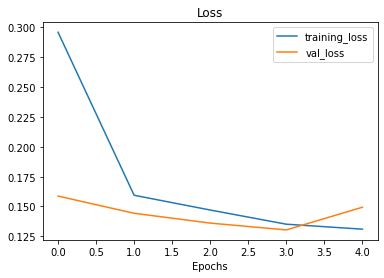

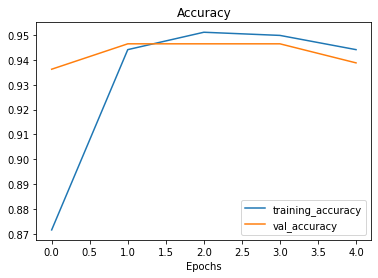

In [ ]:
plot_loss_curves(inception_history)

In [ ]:
efficientnet_model.evaluate(test_data)

13/13 [==============================] - 25s 2s/step - loss: 0.1097 - accuracy: 0.9643


[0.10974571853876114, 0.9642857313156128]

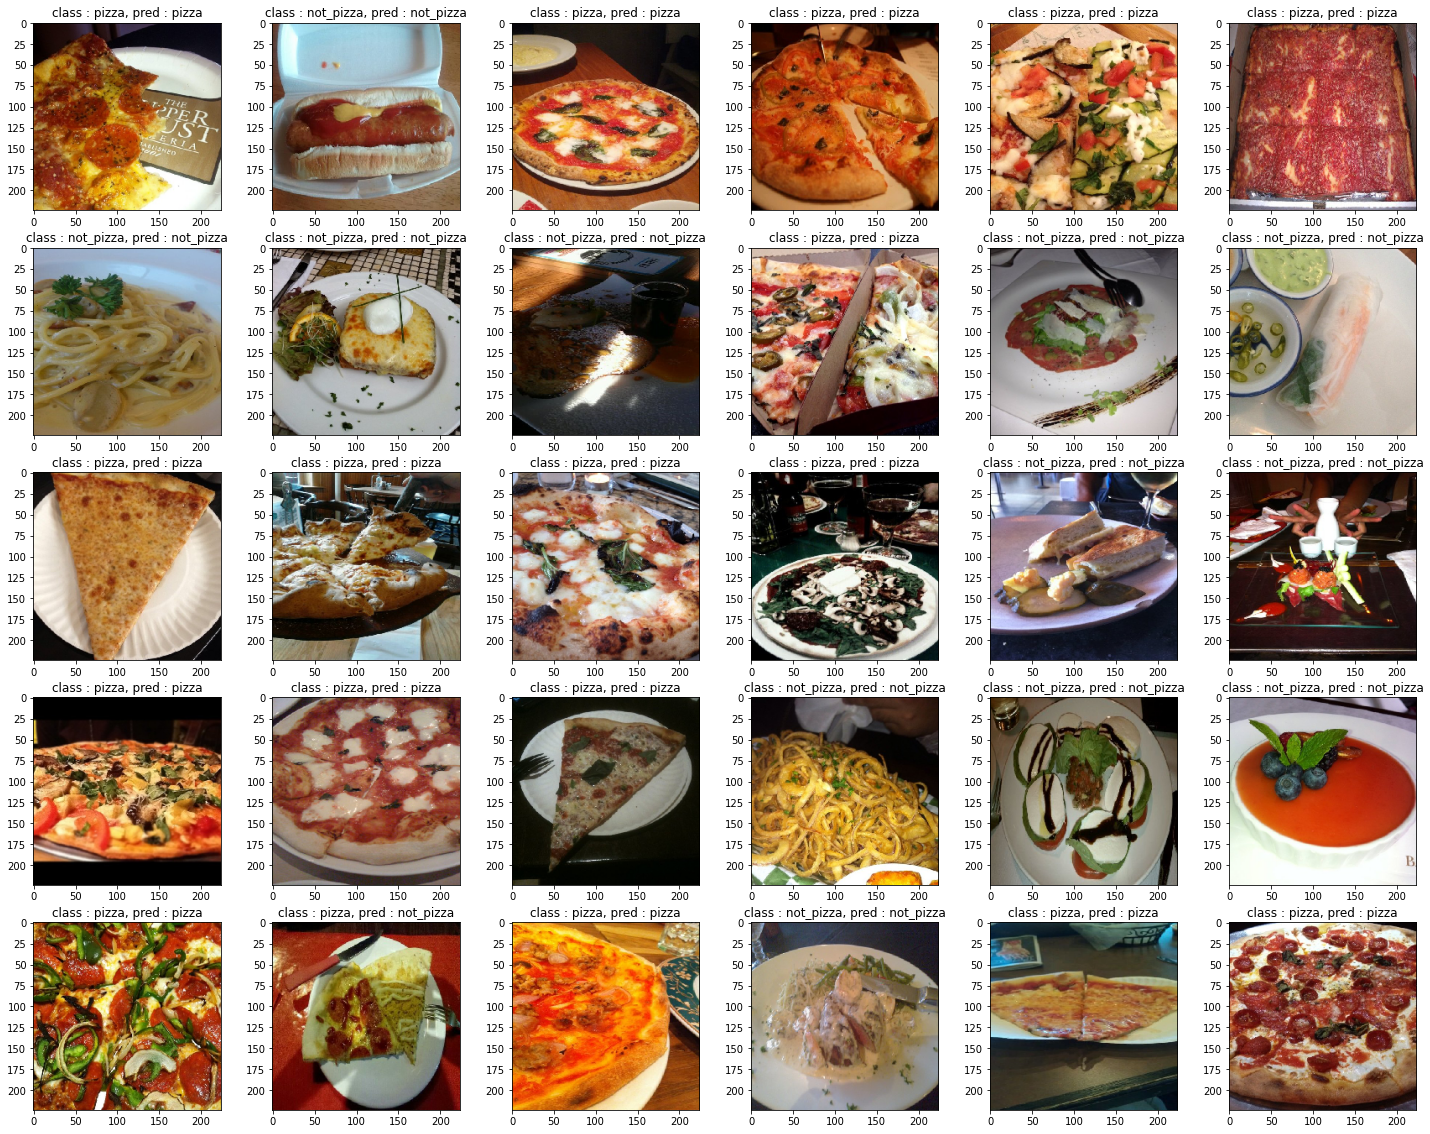

In [ ]:
num=1
class_names = ['not_pizza', 'pizza']
plt.figure(figsize=(25,20))
for images, labels in test_data:
  i = np.random.randint(len(images))
  image = images[i]
  label = int(labels[i])
  pred =  int(np.round(efficientnet_model.predict(image.reshape(-1,224,224,3),verbose=0)))
  plt.subplot(5,6,num)
  plt.imshow(image)
  plt.title(f"class : {class_names[label]}, pred : {class_names[pred]}")
  num=num+1
  if num>=31:
    break
plt.show()